In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

# Linear Regression
Plot below represents linear regression model of sqft_living to price. Score equal to 0.4967 implies that around 49.67% of the variance in the price can be explained by linear relationship with sqft_living.

In [21]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:
model.fit(X, y)

#Hint: .fit()

LinearRegression()

w0:  -32304.654721028463
w1:  [269.46205468]
Score:  0.49670880166311393


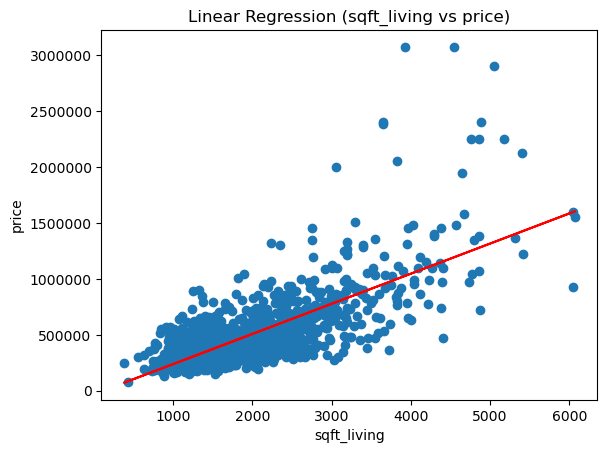

In [22]:
#b)

#Your code:
print("w0: ", model.intercept_)
print("w1: ", model.coef_)
print("Score: ", model.score(X, y))

price_y_pred = model.predict(X)

plt.ticklabel_format(axis="y", style="plain")
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.title('Linear Regression (sqft_living vs price)')
plt.scatter(X, y)
plt.plot(X, price_y_pred, color='red')

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

# Polynomial regression
In this case line fits well at the beginning but there is more price variation with bigger sqft_living at the end. This suggest more complex relationship than linear one, which might be expressed a little bit better by polynomials. Its worth to point that high degree polynomials tend to be bad at predicting values outside of training sample which can be seen in next exercises (here we see that the higher the order the better fit we get - error decreases, but that usually leads to overfitting). Additionally when we take into the account our knowledge about the data, the drop in higher degrees suggesting that properties with highest living area are at some point cheaper than those with lower isn't realistic.

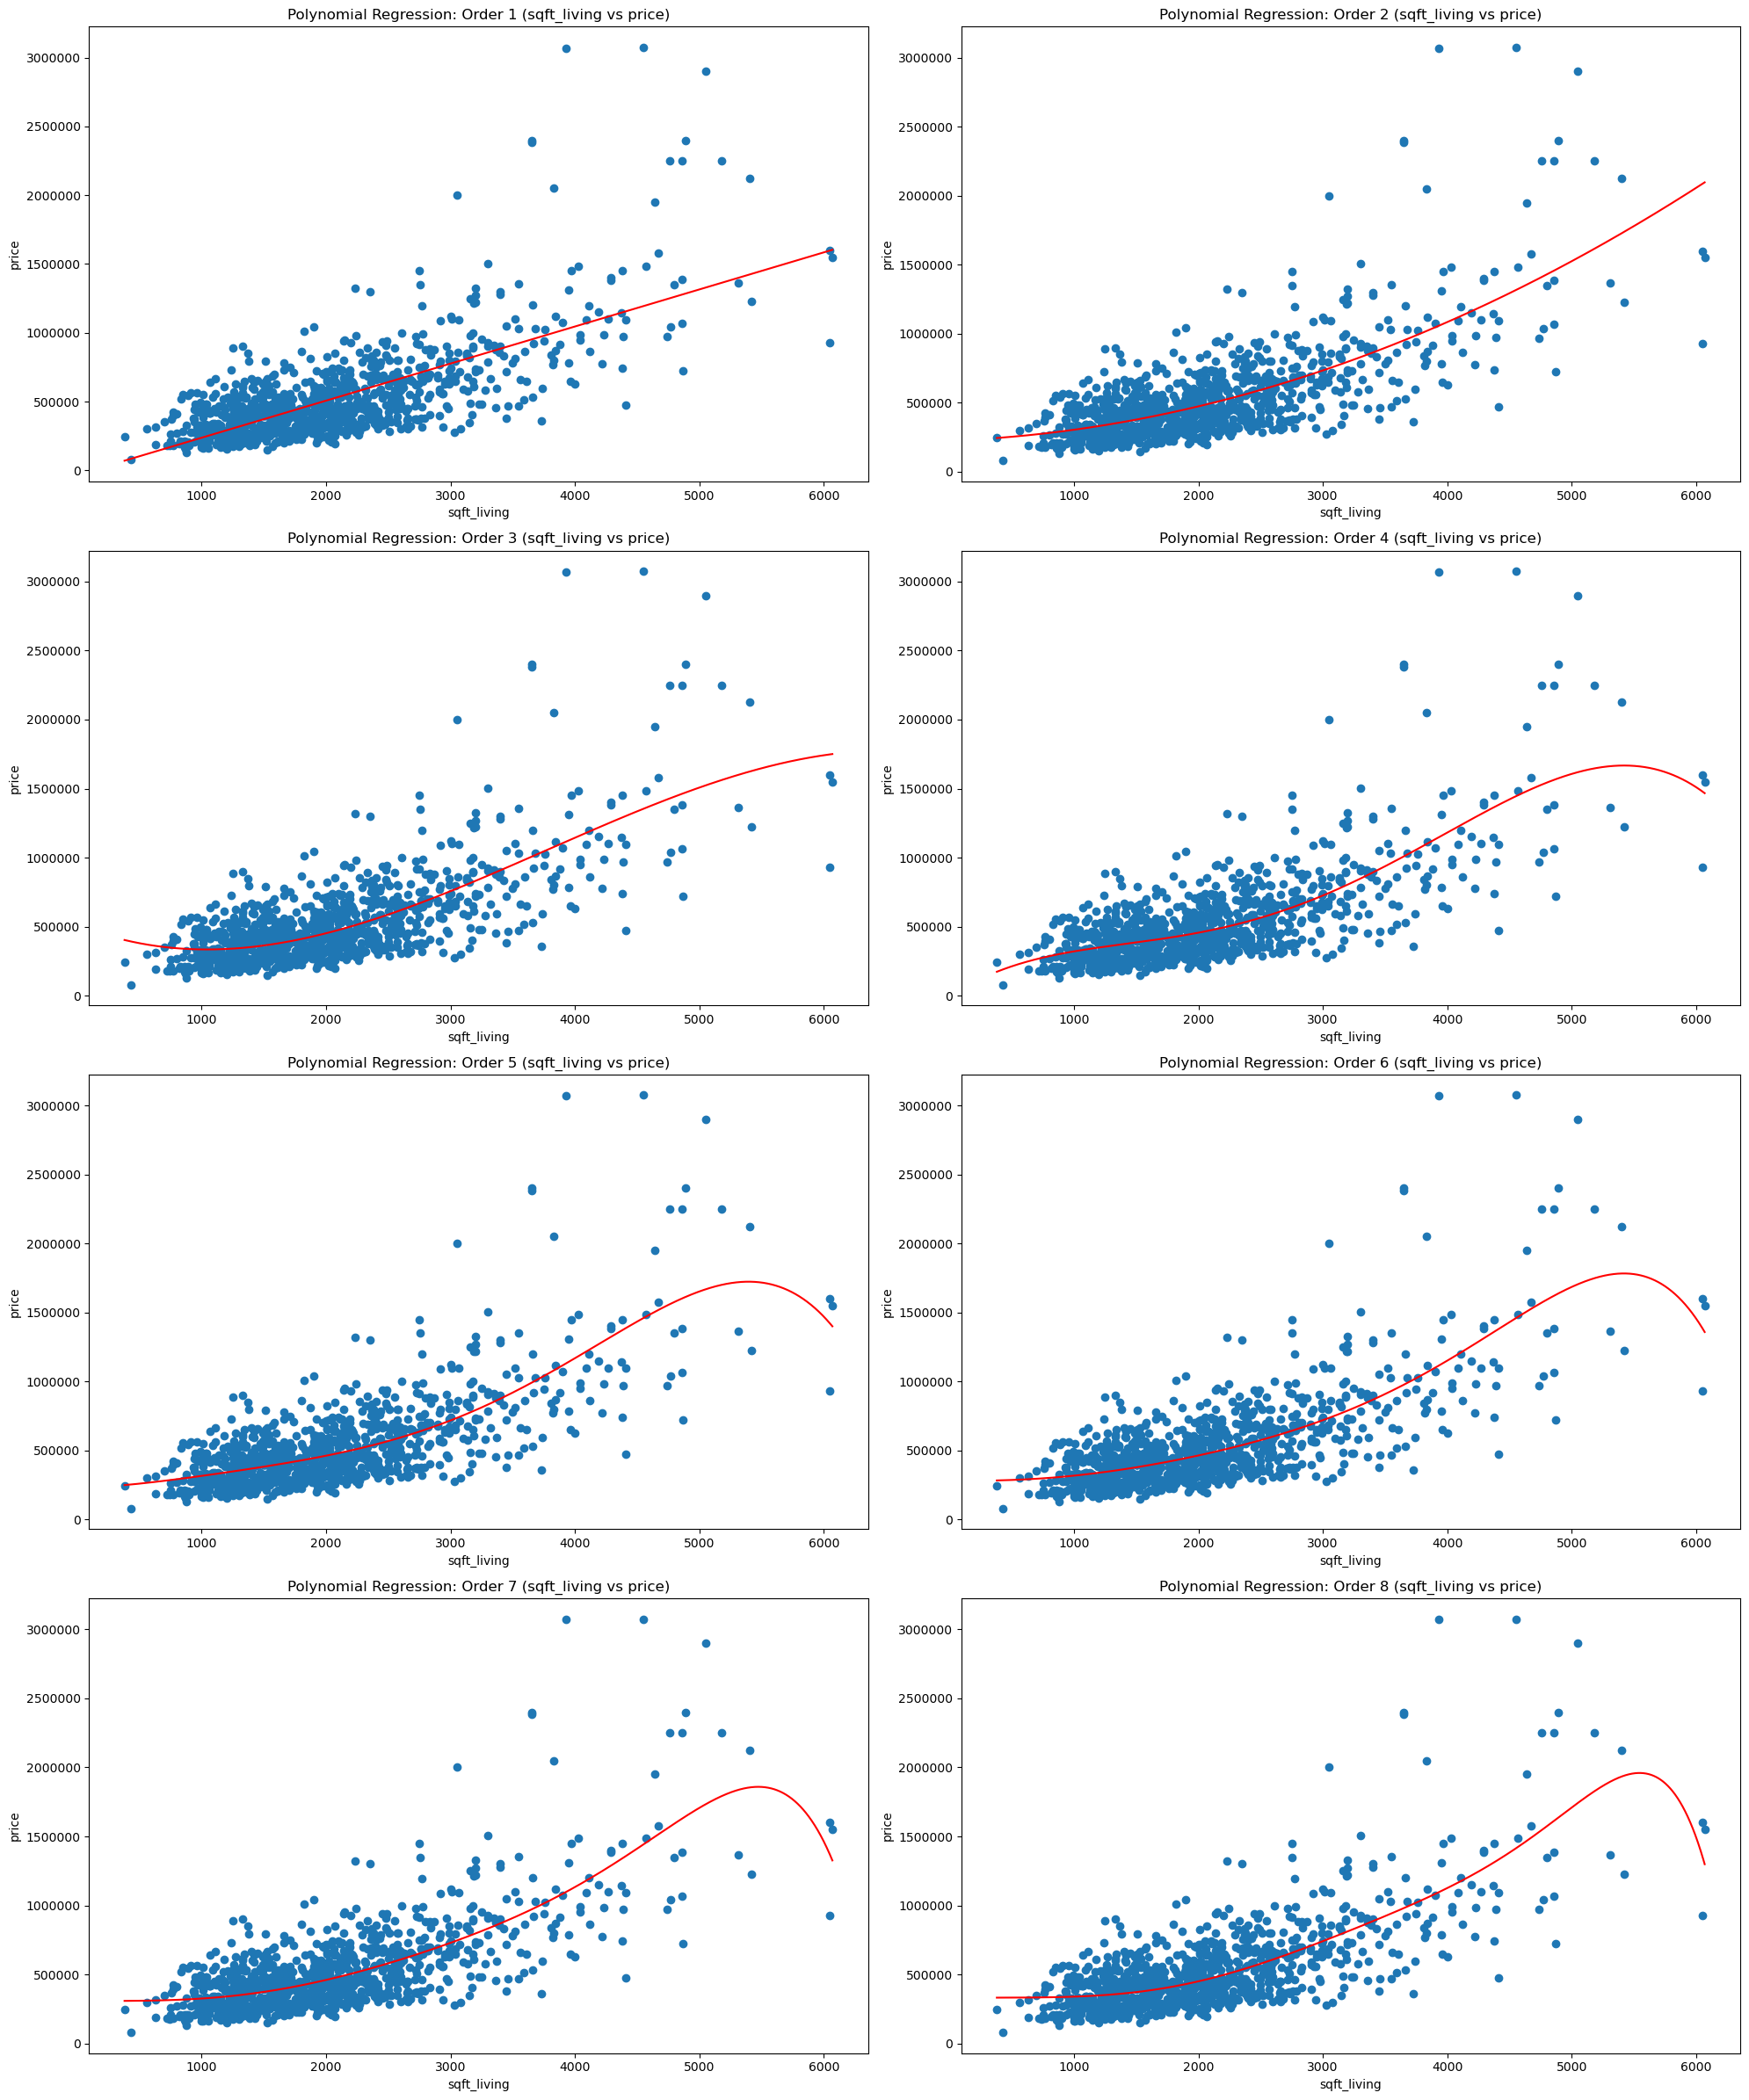

In [23]:
#c)
X_smooth = np.arange(X.min(), X.max()).reshape(-1, 1)

fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.flatten()

error = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    #Your code:
    model.fit(X_order, y)
    price_y_pred = model.predict(poly.fit_transform(X_smooth))
    
    error.append(mean_squared_error(y, model.predict(X_order)))
    
    ax = axes[order - 1]
    
    ax.ticklabel_format(axis="y", style="plain")
    ax.scatter(X, y)
    ax.plot(X_smooth, price_y_pred, color='r')
    ax.set_xlabel('sqft_living')
    ax.set_ylabel('price')
    ax.set_title(f'Polynomial Regression: Order {order} (sqft_living vs price)')

plt.tight_layout()
plt.show()
    


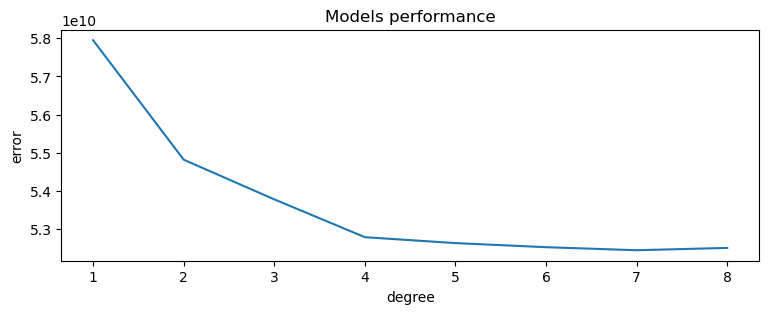

In [24]:
#Your code:
plt.figure(figsize=(9, 3))
plt.ylabel('error')
plt.xlabel('degree')
plt.title('Models performance')
plt.plot([x for x in range(1, 9)], error)

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

## Training and test sample
Splitting the data into test and training sample helps us in assessing models performance. Consistent drop in error on training data due to rising degree of a polynomials tells us only that there is a better fit to the training data with higher degrees. Taking into the acount error on the test sample tells us much more about ability of the model to predicit 'real' values. In this case the best option is 3rd degree polynomial due to the lowest error for test data. Its worth to add that test error may be lower in general than train error. This may be caused by the way the data was divided - it changes when we use different samples.

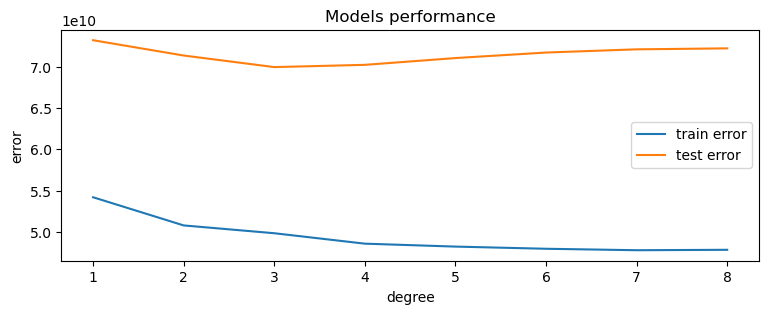

In [25]:
#a)
train_error = []
test_error = []

for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
    poly = PolynomialFeatures(order, include_bias = False)
    
    X_order_train = poly.fit_transform(X_train)
    X_order_test = poly.fit_transform(X_test)
    
    model.fit(X_order_train, y_train)
    
    train_error.append(mean_squared_error(y_train, model.predict(X_order_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_order_test)))
    
plt.figure(figsize=(9, 3))
plt.ylabel('error')
plt.xlabel('degree')
plt.title('Models performance')
plt.plot([x for x in range(1, 9)], train_error, label='train error')
plt.plot([x for x in range(1, 9)], test_error, label='test error')
plt.legend()

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

# Distortion
As in previous case there is more complex relationship than linear. When we take a look at higher order polynomials expected overfitting doesnt occur. Instead at some point model breaks and doesnt seem to fit the data as well as before. What's more the error for both test and train sample starts to increase respectively from 4th and 5th degree. Overall this behaviour might be caused by having many data points that share the same value. In this case we can settle down with smaller degree polynomials where the issue doesnt occur or we can try to extract data that will give better results. Third option would be using different models like Ridge, Lasso or ElasticNet Regression (which I succesfully used).

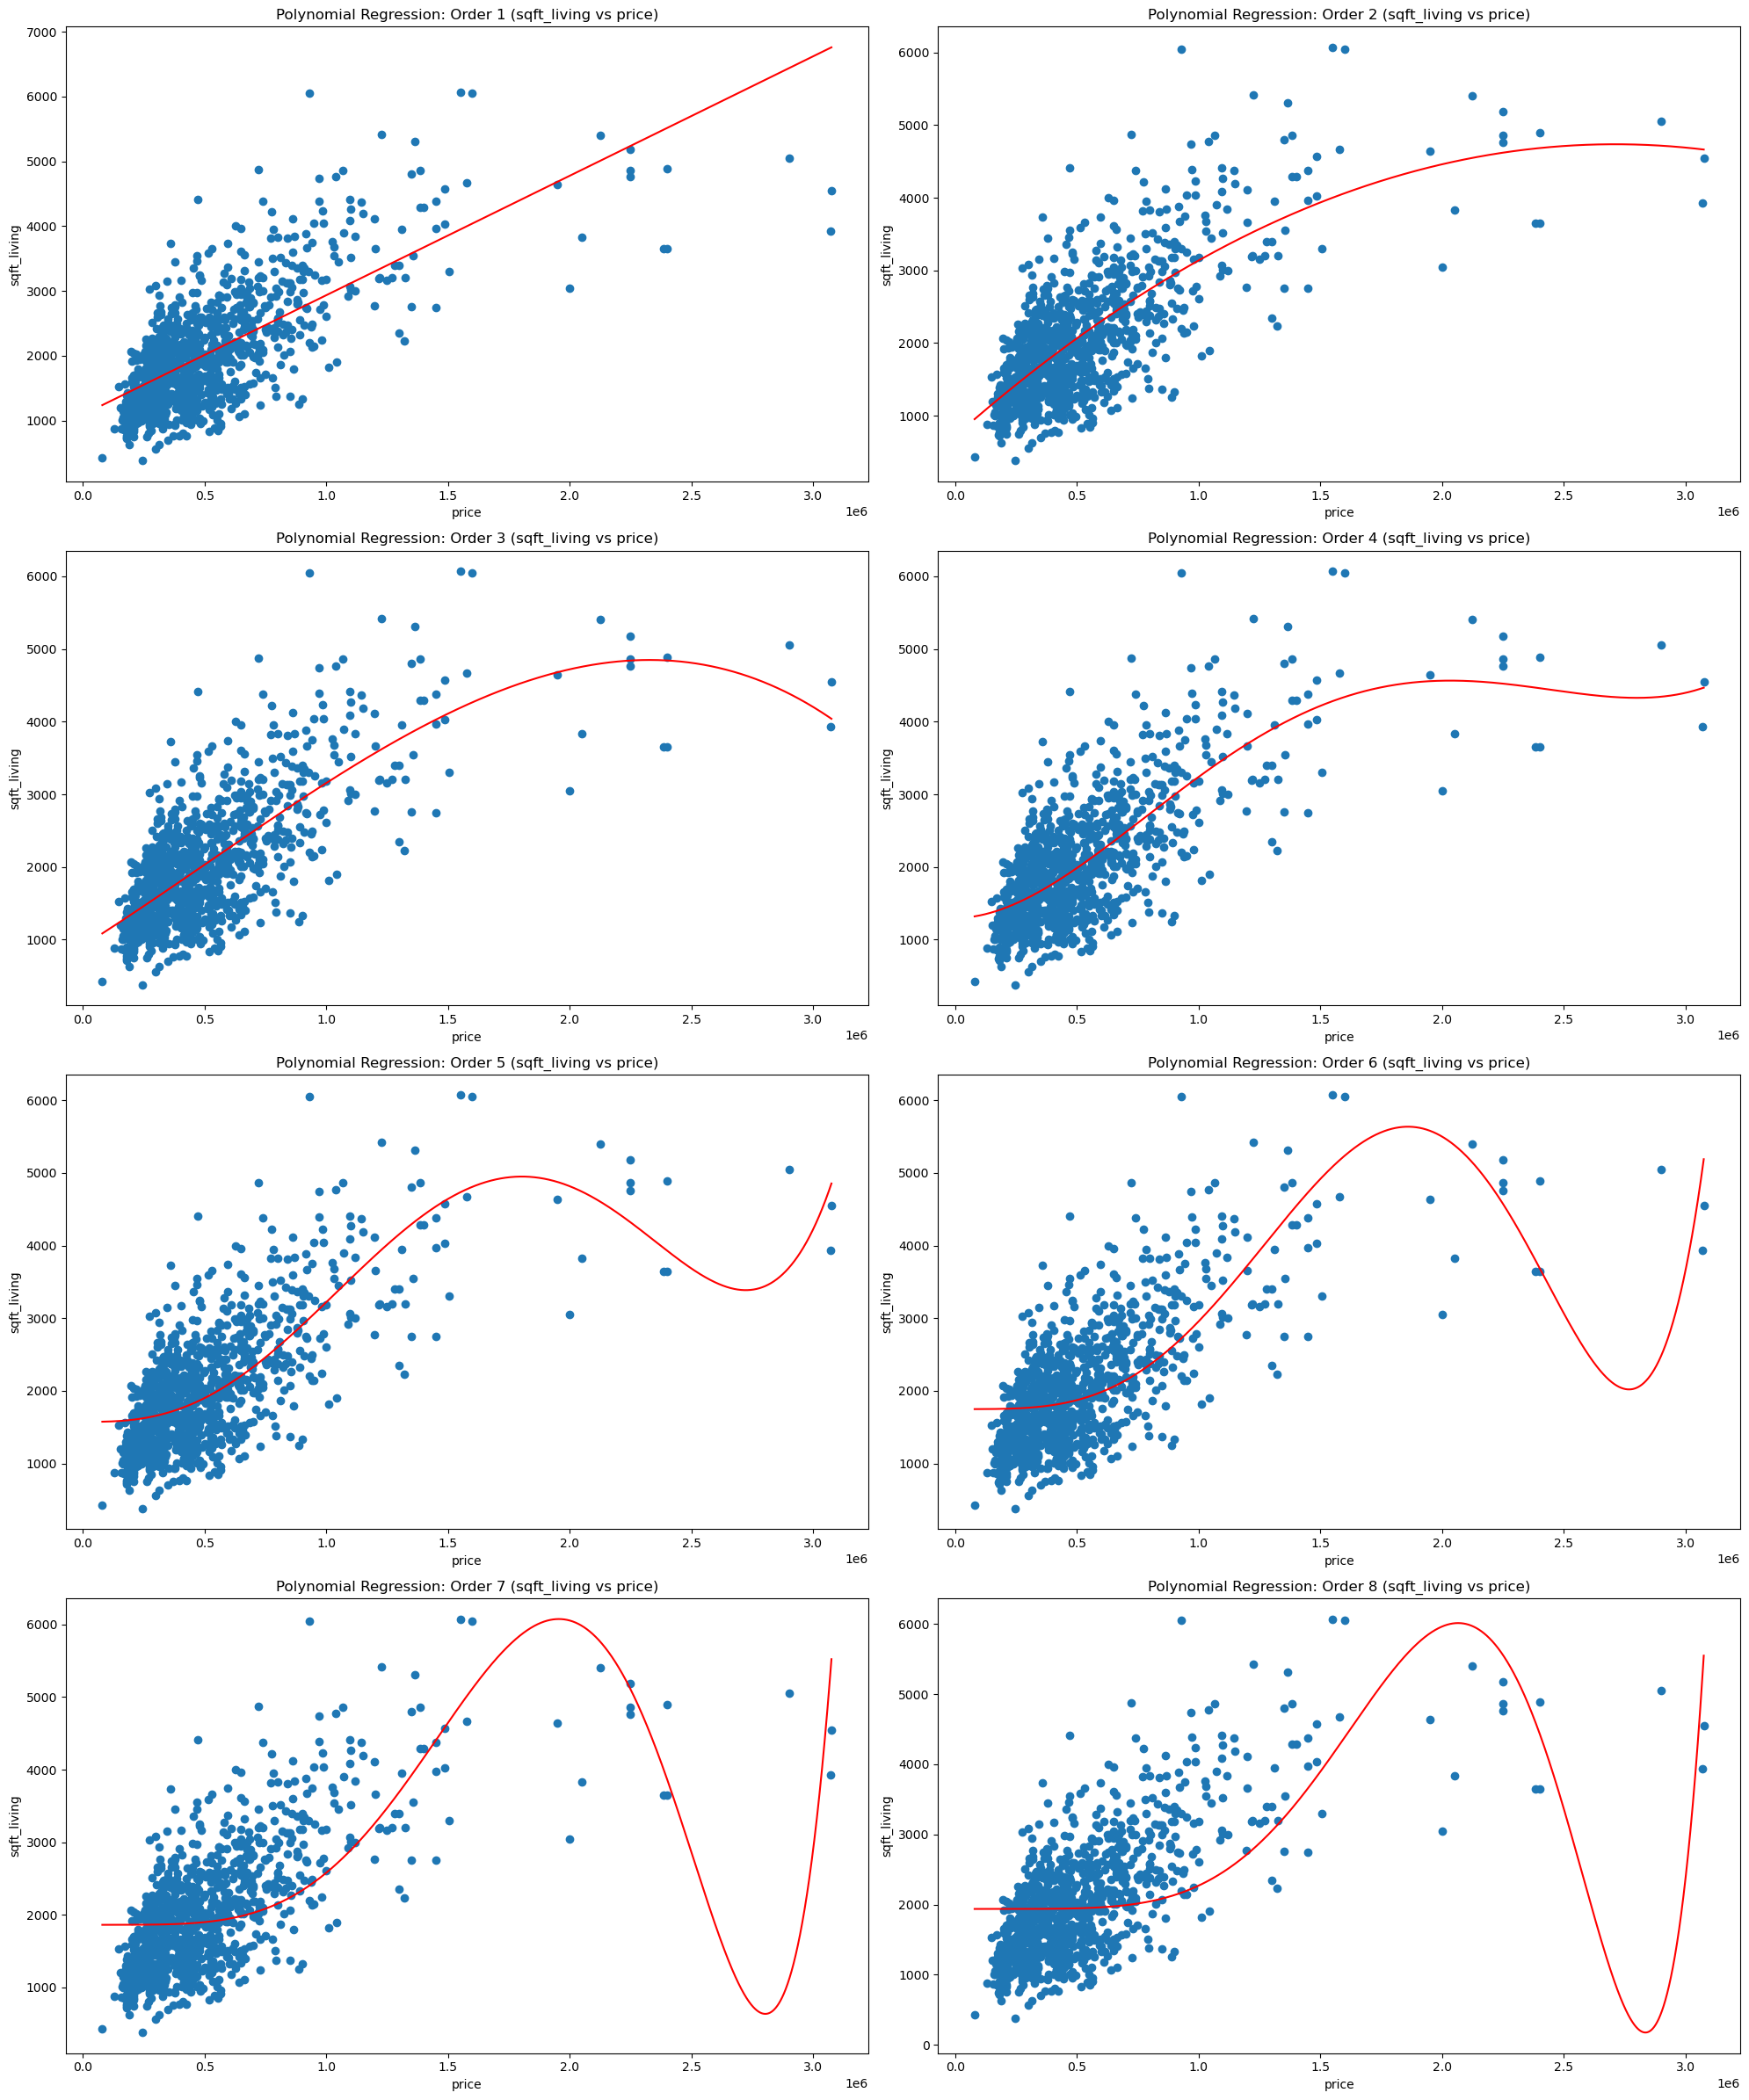

In [26]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

X_smooth = np.arange(X.min(), X.max(), 1).reshape(-1, 1)

fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.flatten()

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    #Your code:
    model.fit(X_order, y)
    price_y_pred = model.predict(poly.fit_transform(X_smooth))
    
    ax = axes[order - 1]
    
    ax.ticklabel_format(axis="y", style="plain")
    ax.scatter(X, y)
    ax.plot(X_smooth, price_y_pred, color='r')
    ax.set_xlabel('price')
    ax.set_ylabel('sqft_living')
    ax.set_title(f'Polynomial Regression: Order {order} (sqft_living vs price)')

plt.tight_layout()
plt.show()

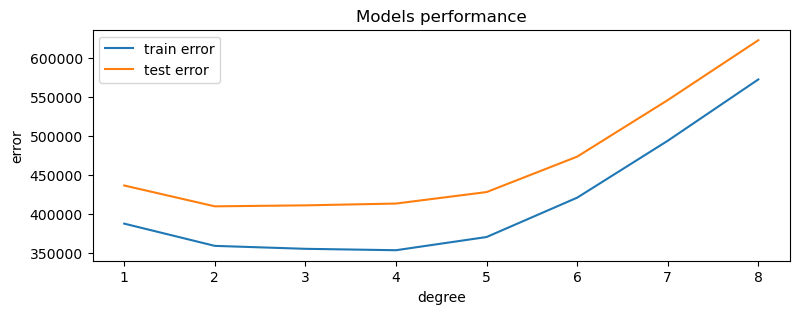

In [27]:
train_error = []
test_error = []

for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
    poly = PolynomialFeatures(order, include_bias = False)
    
    X_order_train = poly.fit_transform(X_train)
    X_order_test = poly.fit_transform(X_test)
    
    model.fit(X_order_train, y_train)
    
    train_error.append(mean_squared_error(y_train, model.predict(X_order_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_order_test)))
    
plt.figure(figsize=(9, 3))
plt.ylabel('error')
plt.xlabel('degree')
plt.title('Models performance')
plt.plot([x for x in range(1, 9)], train_error, label='train error')
plt.plot([x for x in range(1, 9)], test_error, label='test error')
plt.legend()

## ElasticNet Regression

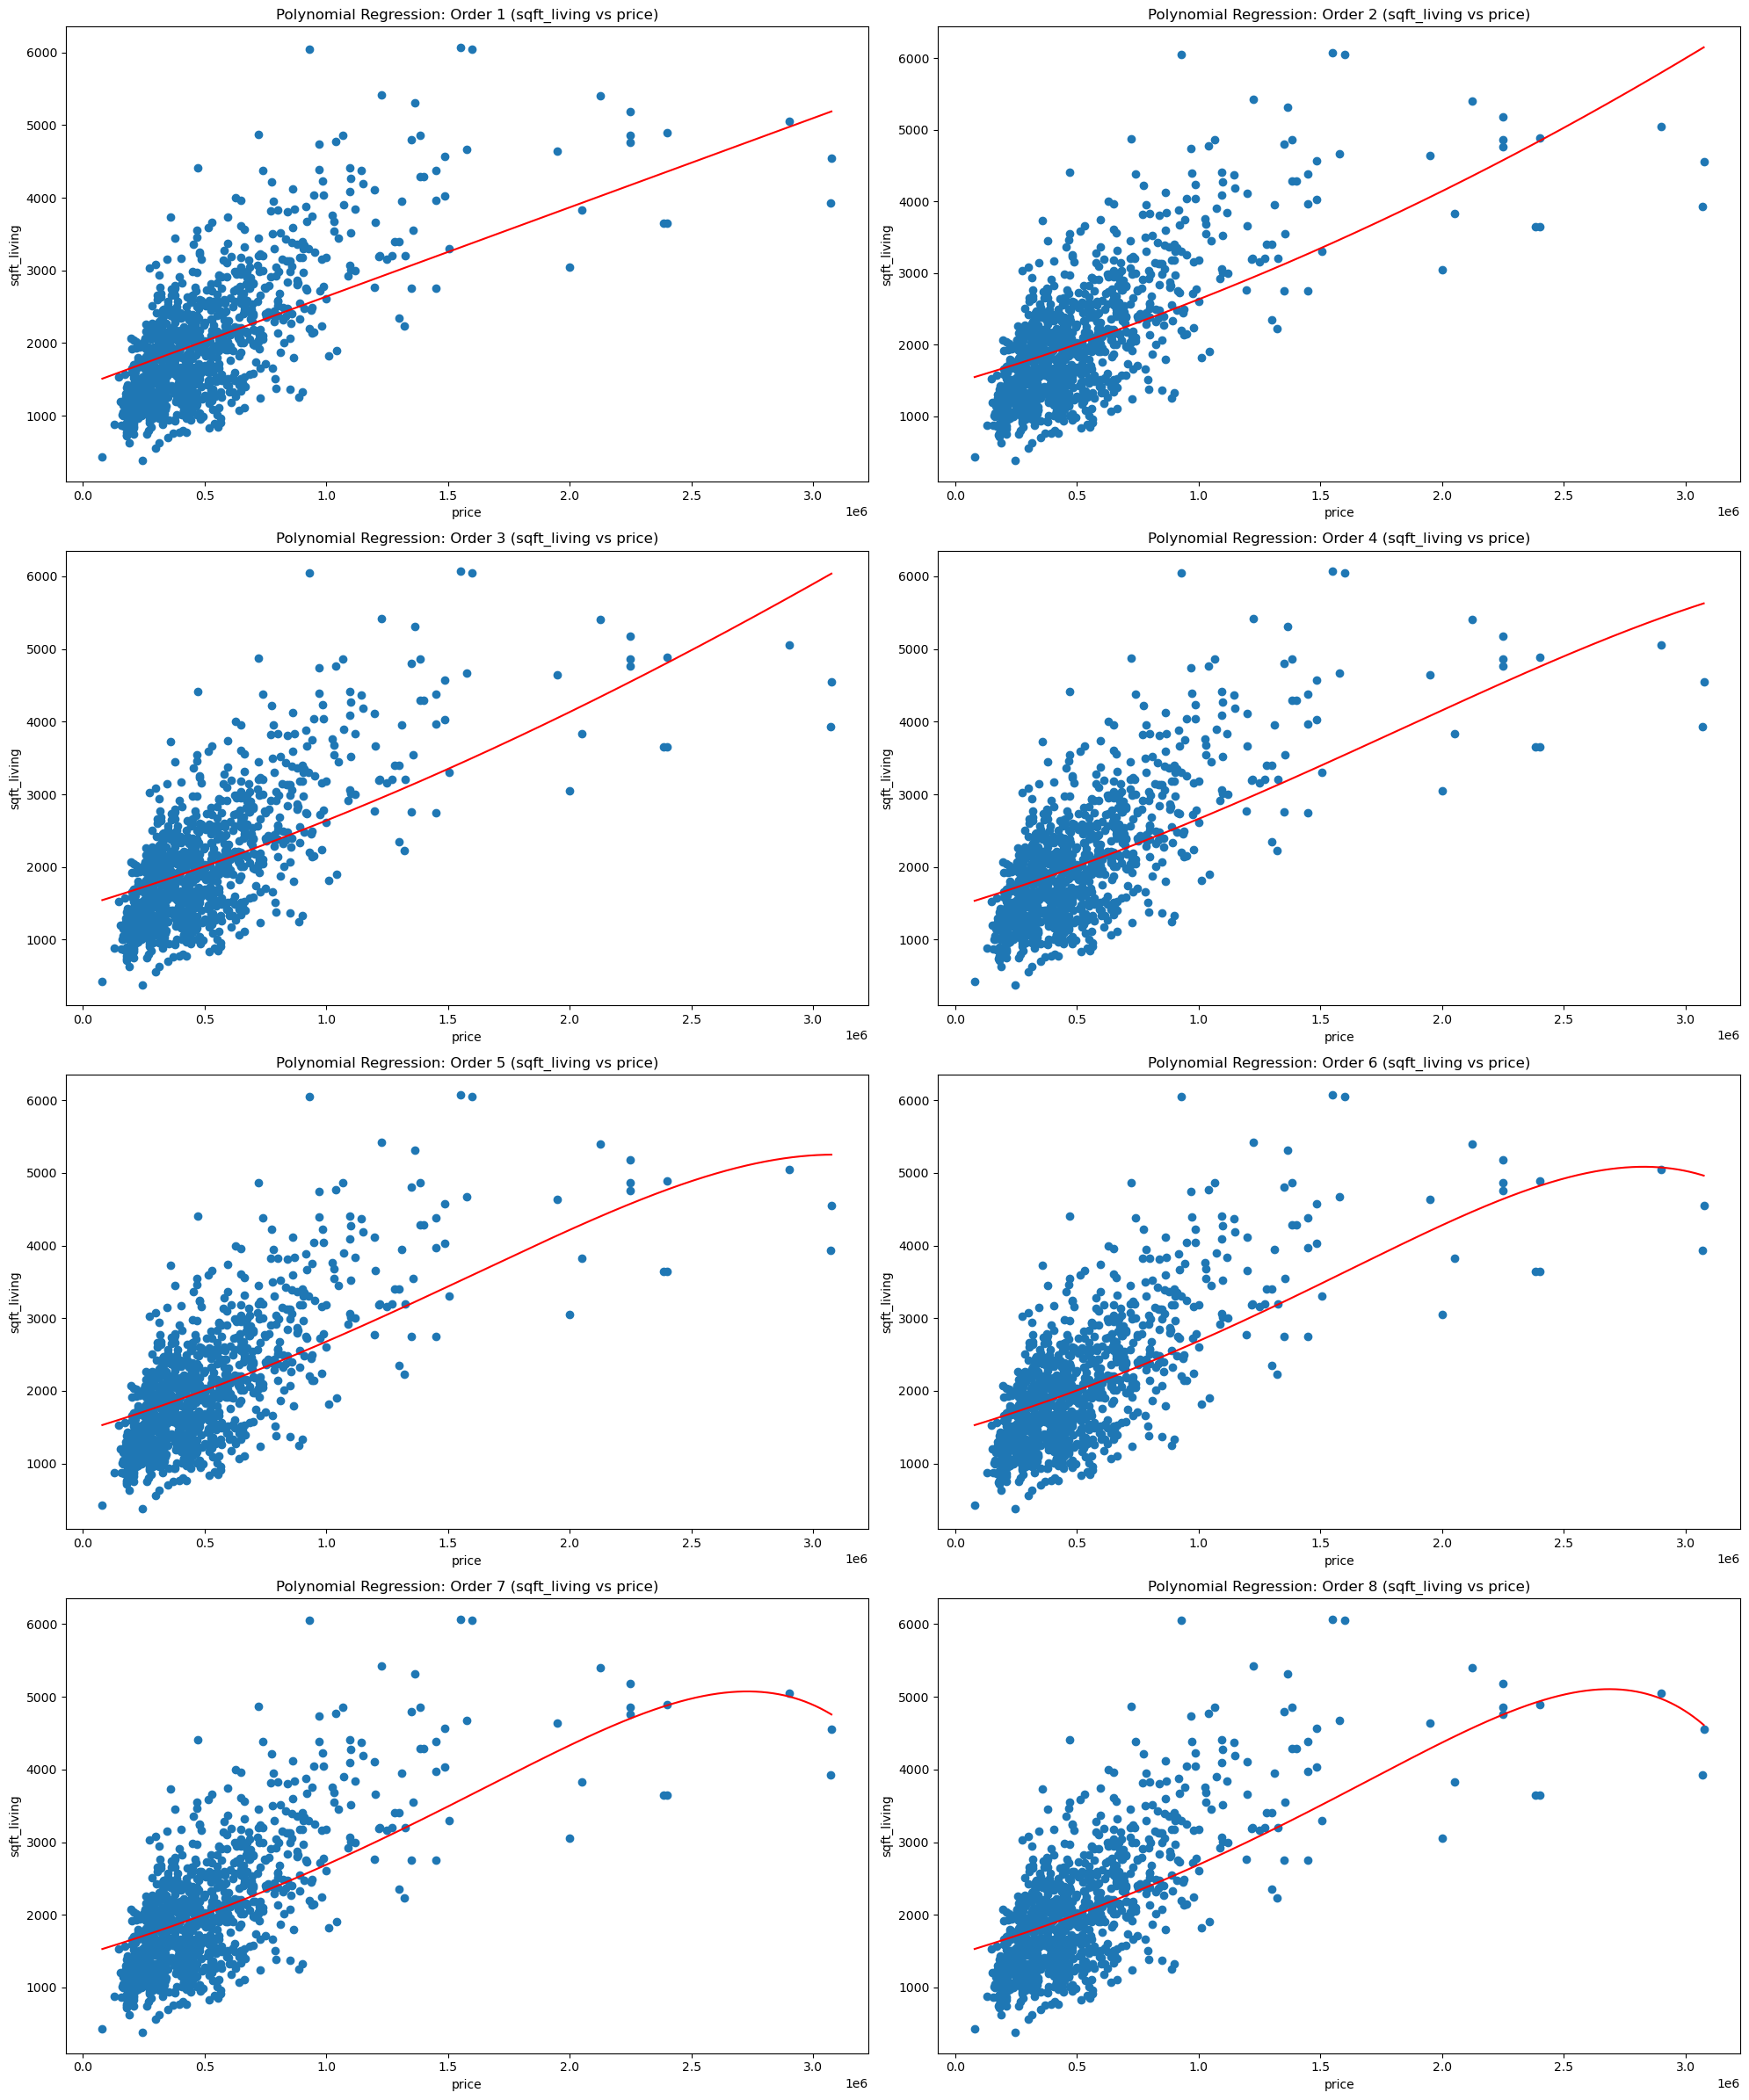

In [28]:
X_smooth = np.arange(X.min(), X.max(), 1).reshape(-1, 1)

fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.flatten()

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
scaler = StandardScaler()

for order in range(1, 9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    X_order_scaled = scaler.fit_transform(X_order)
    X_smooth_scaled = scaler.transform(poly.transform(X_smooth))

    model.fit(X_order_scaled, y)
    price_y_pred = model.predict(X_smooth_scaled)

    ax = axes[order - 1]

    ax.ticklabel_format(axis="y", style="plain")
    ax.scatter(X, y)
    ax.plot(X_smooth, price_y_pred, color='r')
    ax.set_xlabel('price')
    ax.set_ylabel('sqft_living')
    ax.set_title(f'Polynomial Regression: Order {order} (sqft_living vs price)')

plt.tight_layout()
plt.show()

## Improved model
I achieved the best result using 7 features: 'sqft_living', 'sqft_lot', 'grade', 'view', 'condition', 'zipcode', 'lat'. Additionally Ridge with alpha=0.08 does slightly better than Linear Regression having better r2 score and mean squared error.

In [32]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_test, y_pred)))
print("r2_score: {0}".format(r2_score(y_test, y_pred)))

Mean squared error equals: 48749590917.385284
r2_score: 0.6420294254869627


In [41]:
#Your model:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'condition', 'zipcode', 'lat']].values.reshape(-1,7)

X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = Ridge(alpha=0.08)
# model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_test, y_pred)))
print("r2_score: {0}".format(r2_score(y_test, y_pred)))

Mean squared error equals: 32093270998.39487
r2_score: 0.7643375782010726


C:\Users\maury\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.32959e-39): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [31]:
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_test, y_pred)))
print("r2_score: {0}".format(r2_score(y_test, y_pred)))

Mean squared error equals: 34899906686.22827
r2_score: 0.743728318293125
